In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.isnull().sum(axis = 0) #No Missing Data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
## It's odd that there's houses with no bedrooms or bathrooms. Gonna check for bedrooms first
df[["bedrooms"]].value_counts().sort_index() ##0 bedrooms and 8 and above bedrooms seems weird. Gonna dig the floors and sqft_living

bedrooms
0             13
1            199
2           2760
3           9824
4           6882
5           1601
6            272
7             38
8             13
9              6
10             3
11             1
33             1
Name: count, dtype: int64

In [6]:
df[(df["bedrooms"] >= 8)][["bedrooms", "price", "sqft_living", "floors"]].describe()

,bedrooms,price,sqft_living,floors
count,24.000000,2.400000e+01,24.000000,24.000000
mean,9.666667,9.728333e+05,3657.916667,1.791667
std,5.044727,6.980428e+05,1168.127372,0.624094
min,8.000000,3.400000e+05,1620.000000,1.000000
25%,8.000000,5.612500e+05,2842.500000,1.000000
50%,8.000000,6.900000e+05,3665.000000,2.000000
75%,9.000000,1.181000e+06,4112.500000,2.000000
max,33.000000,3.300000e+06,7710.000000,3.500000


In [7]:
df[(df["bedrooms"] < 8) & (df['bedrooms'] > 0)][["bedrooms", "price", "sqft_living", "floors"]].describe()

,bedrooms,price,sqft_living,floors
count,21576.000000,2.157600e+04,21576.000000,21576.000000
mean,3.365869,5.396855e+05,2078.368604,1.493697
std,0.887921,3.663383e+05,916.403655,0.539501
min,1.000000,7.500000e+04,370.000000,1.000000
25%,3.000000,3.215000e+05,1420.000000,1.000000
50%,3.000000,4.500000e+05,1910.000000,1.500000
75%,4.000000,6.450000e+05,2550.000000,2.000000
max,7.000000,7.700000e+06,13540.000000,3.500000


In [8]:
##Checking the 33 bedrooms house

df[(df["bedrooms"] > 32)] ## When the median of sqft_living is 1910, is extremely unlikely a 1620 sqft house has 33 bedrooms.
                          ##Probably a mistake in the data, either pop it or deal as na

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [9]:
##Checking the 11 bedrooms house

df[(df["bedrooms"] == 11)] ## This one seems fine

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,20140821T000000,520000.0,11,3.0,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960


In [10]:
## Gonna check the 9 and 10 bedrooms house just in case something odd pops up
df[(df["bedrooms"] == 9) | (df["bedrooms"] == 10)] ## This one seems fine

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4096,1997200215,20140507T000000,599999.0,9,4.50,3830,6988,2.5,0,0,...,7,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291
4235,2902200015,20150106T000000,700000.0,9,3.00,3680,4400,2.0,0,0,...,7,2830,850,1908,0,98102,47.6374,-122.324,1960,2450
6079,9822700190,20140808T000000,1280000.0,9,4.50,3650,5000,2.0,0,0,...,8,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000
8546,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
16844,8823900290,20150317T000000,1400000.0,9,4.00,4620,5508,2.5,0,0,...,11,3870,750,1915,0,98105,47.6684,-122.309,2710,4320
18443,8823901445,20150313T000000,934000.0,9,3.00,2820,4480,2.0,0,0,...,7,1880,940,1918,0,98105,47.6654,-122.307,2460,4400
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


In [11]:
## Checking the 0 bedrooms houses. If they have small living areas, probably just studios
df[(df["bedrooms"] == 0)] ## Its weird houses with no bedrooms with 2 or more floors. However, the weirdest seems the 0.0 bathrooms houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [12]:
##Checking the 0 bathrooms houses
df[(df["bathrooms"] == 0)].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.000000e+01,1.000000e+01,10.000000,10.0,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.725288e+09,4.481600e+05,0.300000,0.0,1636.800000,16286.600000,1.750000,0.0,0.400000,2.900000,6.300000,1636.800000,0.0,1971.200000,0.0,98052.900000,47.519810,-122.049100,1899.000000,17288.100000
std,2.682079e+09,4.153902e+05,0.483046,0.0,1421.575402,13822.412791,0.920447,0.0,0.843274,0.875595,3.164034,1421.575402,0.0,28.588265,0.0,39.438982,0.157723,0.215455,1121.541102,13779.208697
min,2.031004e+08,7.500000e+04,0.000000,0.0,290.000000,979.000000,1.000000,0.0,0.000000,1.000000,1.000000,290.000000,0.0,1913.000000,0.0,98001.000000,47.263800,-122.356000,990.000000,1399.000000
25%,3.386145e+09,1.652500e+05,0.000000,0.0,675.000000,4773.000000,1.000000,0.0,0.000000,3.000000,4.000000,675.000000,0.0,1953.250000,0.0,98025.750000,47.438750,-122.229500,1215.000000,7412.500000
50%,3.949350e+09,3.175000e+05,0.000000,0.0,1157.000000,14462.000000,1.500000,0.0,0.000000,3.000000,7.000000,1157.000000,0.0,1978.000000,0.0,98049.000000,47.531200,-122.012000,1545.000000,14445.000000
75%,6.155425e+09,4.580000e+05,0.750000,0.0,2212.500000,24186.750000,2.000000,0.0,0.000000,3.000000,7.750000,2212.500000,0.0,1990.000000,0.0,98062.000000,47.641225,-121.892500,2192.500000,22774.750000
max,9.543000e+09,1.295650e+06,1.000000,0.0,4810.000000,43377.000000,3.500000,0.0,2.000000,4.000000,12.000000,4810.000000,0.0,2006.000000,0.0,98133.000000,47.714500,-121.749000,4740.000000,42882.000000


In [13]:
##Checking the 0 bathrooms houses
df[(df["bathrooms"] == 0)] ## I do not believe this is right. Also, sqft_living and sqft_above has a lot of equals columns. Gonna check this

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.0,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,20150205T000000,380000.0,0,0.0,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,5702500050,20141104T000000,280000.0,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,20140624T000000,1295650.0,0,0.0,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,203100435,20140918T000000,484000.0,1,0.0,690,23244,1.0,0,0,...,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,9543000205,20150413T000000,139950.0,0,0.0,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [14]:
## Excluding the 0 bathrooms and the 33 bedrooms houses
df = df[(df["bathrooms"] > 0) & (df["bedrooms"] < 33)]

In [15]:
## Checking the sqft_living and sqft_above
(df["sqft_living"] == df["sqft_above"]).value_counts() ## What does it mean? What are the differences?

True     13116
False     8486
Name: count, dtype: int64

In [16]:
df[(df["sqft_living"] == df["sqft_above"])].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [17]:
df[(df["sqft_living"] != df["sqft_above"])].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
10,1736800520,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925


In [18]:
## It looks like the basement is added
df["sqft_b_l"] = df["sqft_basement"] + df["sqft_above"]
print((df["sqft_b_l"] == df["sqft_living"]).value_counts()) ##Bazinga.

True    21602
Name: count, dtype: int64


In [19]:
##Droping sqft_b_l
df = df.drop(columns=['sqft_b_l'])

/home/dionizio/anaconda3/envs/house-sales/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


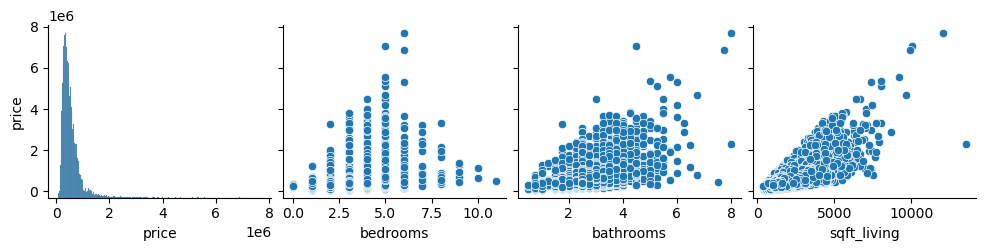

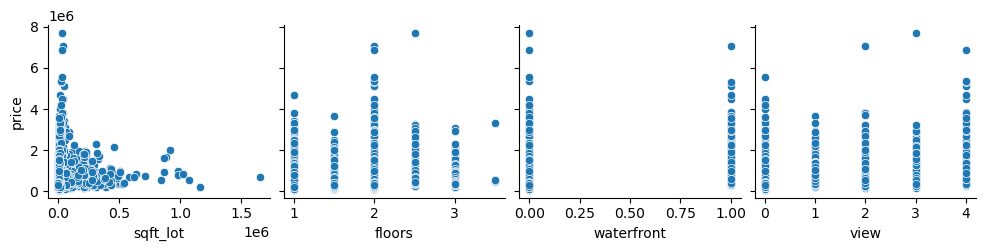

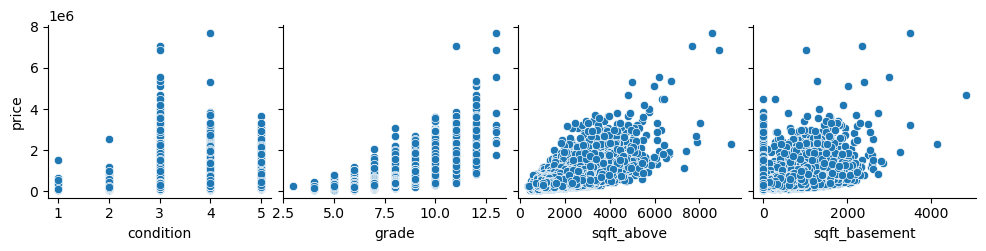

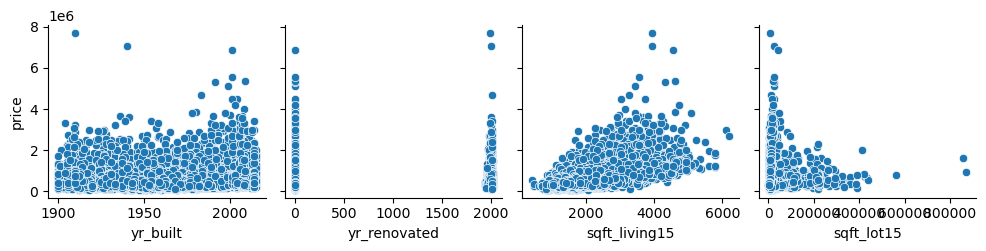

In [20]:
## Pairplotting
pair_df = df.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)
columns = pair_df.columns
columns_group = columns[:4], columns[4:8], columns[8:12], columns[12:]
for cg in columns_group:
    pp = sns.pairplot(df, y_vars=['price'], x_vars = cg)
    pp

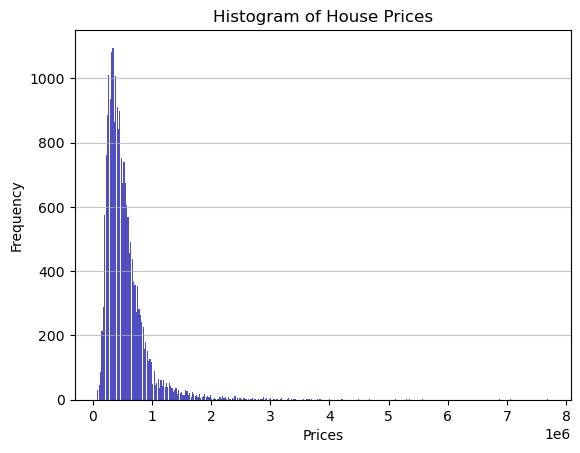

In [21]:
## Doing histogram of the price
n, bins, patches = plt.hist(x=df["price"].values, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Histogram of House Prices')
maxfreq = n.max()

In [22]:
##Checking response variable distribution that looks alike
import scipy.stats as ss
print("Norm:", ss.kstest(df["price"].values, "norm"))
print("Chi-Square: ", ss.chisquare(df["price"].values)) ##Nothing that's ok

Norm: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=78000.0, statistic_sign=-1)
Chi-Square:  Power_divergenceResult(statistic=5389981062.417246, pvalue=0.0)


In [23]:
## Mean, median and std of the price
df[["price"]].agg(['mean', 'std', 'median', "min", "max"])

,price
mean,5.401261e+05
std,3.671168e+05
median,4.500000e+05
min,7.800000e+04
max,7.700000e+06


In [24]:
pair_df.corr()

#There are no negative correlations between prices and other variables. The bathrooms, sqft_living, grade, sqft_above and sqft_living15
#variables have at least a Moderate Positive Correlation (> 0.4). The View variable almost got to the 0.4 lower limit

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.316068,0.525895,0.701925,0.089701,0.256635,0.266436,0.397350,0.036176,0.667849,0.605395,0.323859,0.053861,0.126449,0.585235,0.082494
bedrooms,0.316068,1.000000,0.527208,0.592808,0.032889,0.182653,-0.006766,0.082593,0.024308,0.366609,0.492132,0.309328,0.159728,0.019340,0.403883,0.030685
bathrooms,0.525895,0.527208,1.000000,0.755787,0.087927,0.502455,0.063743,0.188385,-0.126227,0.665883,0.686732,0.283475,0.507006,0.050556,0.569780,0.087538
sqft_living,0.701925,0.592808,0.755787,1.000000,0.172952,0.353812,0.103855,0.284721,-0.059097,0.762854,0.876479,0.435202,0.317937,0.055343,0.756274,0.183428
sqft_lot,0.089701,0.032889,0.087927,0.172952,1.000000,-0.005081,0.021605,0.074804,-0.008891,0.113969,0.183654,0.015304,0.053114,0.007644,0.144663,0.718545
floors,0.256635,0.182653,0.502455,0.353812,-0.005081,1.000000,0.023730,0.028740,-0.263944,0.458593,0.523845,-0.245726,0.489196,0.006380,0.279860,-0.011117
waterfront,0.266436,-0.006766,0.063743,0.103855,0.021605,0.023730,1.000000,0.401972,0.016642,0.082878,0.072110,0.080573,-0.026170,0.092877,0.086505,0.030711
view,0.397350,0.082593,0.188385,0.284721,0.074804,0.028740,0.401972,1.000000,0.046108,0.251708,0.167623,0.277126,-0.053698,0.103964,0.280671,0.072707
condition,0.036176,0.024308,-0.126227,-0.059097,-0.008891,-0.263944,0.016642,0.046108,1.000000,-0.146317,-0.158554,0.173926,-0.361530,-0.060711,-0.092954,-0.003257
grade,0.667849,0.366609,0.665883,0.762854,0.113969,0.458593,0.082878,0.251708,-0.146317,1.000000,0.756115,0.168383,0.447452,0.014323,0.713525,0.119689


In [25]:
## Checking if the data has duplicated id's
num_duplicates = df.duplicated(subset=['id']).sum()

print("Number of duplicated IDs:", num_duplicates)

Number of duplicated IDs: 177


In [26]:
duplicated_rows = df[df.duplicated(subset=['id'], keep=False)]

print("Rows with Duplicated IDs:")
duplicated_rows

Rows with Duplicated IDs:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,20140618T000000,1384000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,20140905T000000,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,20140626T000000,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,20141003T000000,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


In [27]:
duplicated_rows.head(10) ## The duplicated ids are the exactly same house, but the sales prices are quite different. Maybe looking at the
                         ## Date could explain these

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,20140618T000000,1384000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,20140905T000000,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
325,7520000520,20150311T000000,240500.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
345,3969300030,20140723T000000,165000.0,4,1.00,1000,7134,1.0,0,0,...,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
346,3969300030,20141229T000000,239900.0,4,1.00,1000,7134,1.0,0,0,...,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
371,2231500030,20141001T000000,315000.0,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
372,2231500030,20150324T000000,530000.0,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929


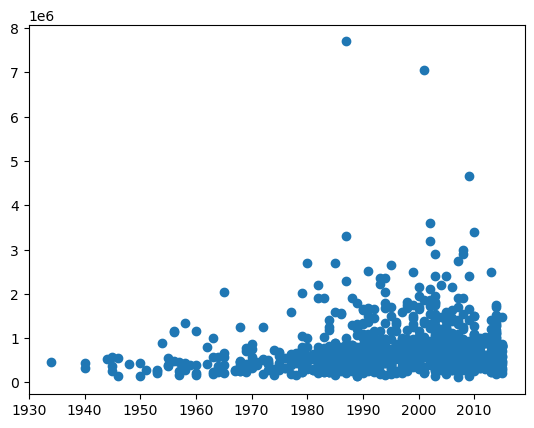

In [28]:
#Checking yr_renovated without the 0's
yr_df = pair_df[pair_df['yr_renovated'] != 0]

X = yr_df[['yr_renovated']].values
y = yr_df['price'].values

plt.scatter(X, y)

In [29]:
## Counting the categorical values
df[['floors', 'view', 'grade', 'condition']]

,floors,view,grade,condition
0,1.0,0,7,3
1,2.0,0,7,3
2,1.0,0,6,3
3,1.0,0,7,5
4,1.0,0,8,3
...,...,...,...,...
21608,3.0,0,8,3
21609,2.0,0,8,3
21610,2.0,0,7,3
21611,2.0,0,8,3


In [30]:
categorical_columns = ['floors', 'view', 'grade', 'condition']
for cat in categorical_columns:
    print("Category: " + cat)
    print(df[[cat]].value_counts().sort_index())

Category: floors
floors
1.0       10674
1.5        1910
2.0        8238
2.5         161
3.0         612
3.5           7
Name: count, dtype: int64
Category: view
view
0       19480
1         332
2         961
3         510
4         319
Name: count, dtype: int64
Category: grade
grade
3           1
4          29
5         242
6        2038
7        8976
8        6066
9        2615
10       1134
11        399
12         89
13         13
Name: count, dtype: int64
Category: condition
condition
1               29
2              171
3            14025
4             5677
5             1700
Name: count, dtype: int64


In [31]:
## Probably is good to check if the condition has anything to do with the renovation or the year it was build
## With renovation:
print("Total: ")
print(yr_df[['condition']].value_counts().sort_index())
print("Proportion: ")
print(yr_df[['condition']].value_counts(normalize=True).sort_index())

Total: 
condition
1              1
2              4
3            736
4            136
5             37
Name: count, dtype: int64
Proportion: 
condition
1            0.001094
2            0.004376
3            0.805252
4            0.148796
5            0.040481
Name: proportion, dtype: float64


In [32]:
## Probably is good to check if the condition has anything to do with the renovation or the year it was build
## Without renovation:
no_renovation_df = df[df['yr_renovated'] == 0]
print("Total: ")
print(no_renovation_df[['condition']].value_counts().sort_index())
print("Proportion: ")
print(no_renovation_df[['condition']].value_counts(normalize=True).sort_index())

Total: 
condition
1               28
2              167
3            13289
4             5541
5             1663
Name: count, dtype: int64
Proportion: 
condition
1            0.001353
2            0.008072
3            0.642353
4            0.267836
5            0.080385
Name: proportion, dtype: float64


In [33]:
## Same for grade idea for the grade
## Probably is good to check if the grade has anything to do with the renovation or the year it was build
## With renovation:
print("Total: ")
print(yr_df[['grade']].value_counts().sort_index())
print("Proportion: ")
print(yr_df[['grade']].value_counts(normalize=True).sort_index())

Total: 
grade
4          1
5          6
6         97
7        336
8        265
9        138
10        50
11        15
12         3
13         3
Name: count, dtype: int64
Proportion: 
grade
4        0.001094
5        0.006565
6        0.106127
7        0.367615
8        0.289934
9        0.150985
10       0.054705
11       0.016411
12       0.003282
13       0.003282
Name: proportion, dtype: float64


In [34]:
## Probably is good to check if the condition has anything to do with the renovation or the year it was build
## Without renovation:
no_renovation_df = df[df['yr_renovated'] == 0]
print("Total: ")
print(no_renovation_df[['grade']].value_counts().sort_index())
print("Proportion: ")
print(no_renovation_df[['grade']].value_counts(normalize=True).sort_index())

Total: 
grade
3           1
4          28
5         236
6        1941
7        8640
8        5801
9        2477
10       1084
11        384
12         86
13         10
Name: count, dtype: int64
Proportion: 
grade
3        0.000048
4        0.001353
5        0.011408
6        0.093823
7        0.417633
8        0.280404
9        0.119731
10       0.052398
11       0.018561
12       0.004157
13       0.000483
Name: proportion, dtype: float64


In [35]:
## Lets check the mean and median price for each grade
grouped_stats = df.groupby('grade')['price'].agg(['mean', 'std', 'median'])
print(grouped_stats)
#Definitely bigger the grade, bigger the price. 

               mean           std     median
grade                                       
3      2.620000e+05           NaN   262000.0
4      2.143810e+05  9.430617e+04   205000.0
5      2.485240e+05  1.181003e+05   228700.0
6      3.019196e+05  1.229703e+05   275276.5
7      4.025255e+05  1.556917e+05   375000.0
8      5.429106e+05  2.174858e+05   510000.0
9      7.735132e+05  3.161201e+05   720000.0
10     1.071771e+06  4.835451e+05   914327.0
11     1.496842e+06  7.050993e+05  1284000.0
12     2.201285e+06  1.029174e+06  1820000.0
13     3.709615e+06  1.859450e+06  2983000.0


/home/dionizio/anaconda3/envs/house-sales/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dionizio/anaconda3/envs/house-sales/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


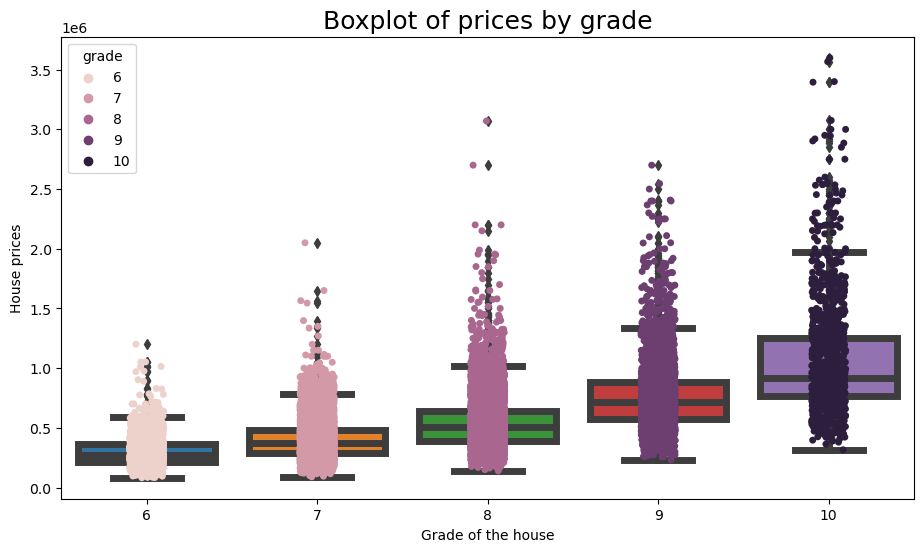

In [36]:
## Doing some boxplot to grades between 6 and 10 (Majority of the data)
plt.figure(figsize =(11, 6))
plt_df = df[['grade', 'price']][(df['grade'] >= 6) & (df['grade'] <= 10)]
ax = sns.boxplot( x = "grade", y ="price",data = plt_df, linewidth=5)
ax = sns.stripplot(x = "grade", y ="price", hue="grade" ,data = plt_df)
plt.title("Boxplot of prices by grade", loc="center", fontsize=18)
plt.xlabel("Grade of the house")
plt.ylabel("House prices")

plt.show() #The chart show a lot of outliars

In [37]:
## Checking outliars numbers when it comes to grade and prices
# Define a function to count outliers using IQR
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers.sum()


for grade in np.unique(df['grade'].values):
    grade_df = df[['grade', 'price']][(df['grade'] == grade)]
    outliers_count = grade_df[['price']].apply(count_outliers)
    print("Grade: {}".format(grade))
    print("Outliers: {}".format(outliers_count.values[0]))

Grade: 3
Outliers: 0
Grade: 4
Outliers: 0
Grade: 5
Outliers: 13
Grade: 6
Outliers: 49
Grade: 7
Outliers: 182
Grade: 8
Outliers: 184
Grade: 9
Outliers: 151
Grade: 10
Outliers: 64
Grade: 11
Outliers: 29
Grade: 12
Outliers: 4
Grade: 13
Outliers: 2


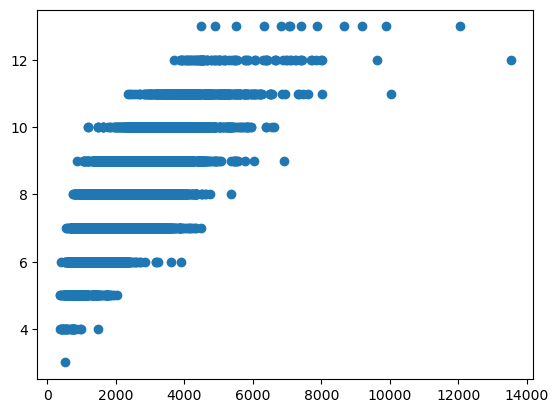

In [38]:
## Checking sqft_living, in relation to grade

X = df[['sqft_living']].values
y = df['grade'].values

plt.scatter(X, y) #Seems to have correlation, as specified in the pearson correlation

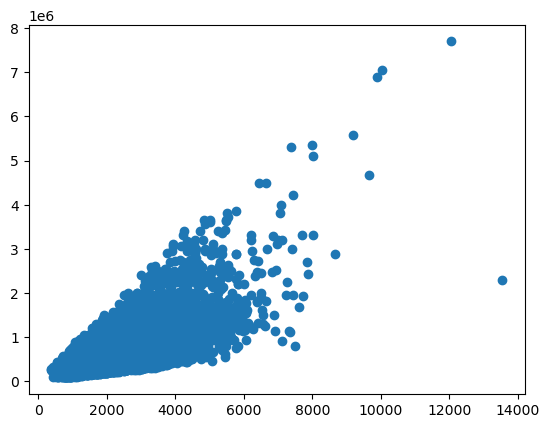

In [39]:
## Checking sqft_living, in relation to price
X = df[['sqft_living']].values
y = df['price'].values

plt.scatter(X, y)

/home/dionizio/anaconda3/envs/house-sales/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dionizio/anaconda3/envs/house-sales/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


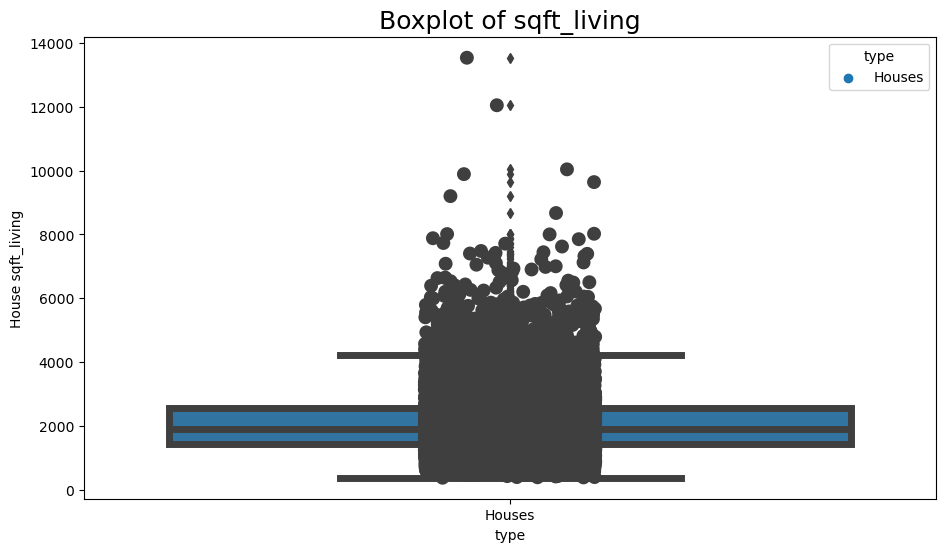

In [40]:
## Boxplot of the sqrt_living

## Doing some boxplot to grades between 6 and 10 (Majority of the data)
plt.figure(figsize =(11, 6))
chart_df = df
chart_df["type"] = "Houses"
ax = sns.boxplot(x=chart_df["type"], y=chart_df["sqft_living"], linewidth=5)
ax = sns.stripplot(x=chart_df["type"], y=chart_df["sqft_living"], hue = chart_df["type"],linewidth=5)
plt.title("Boxplot of sqft_living", loc="center", fontsize=18)
plt.ylabel("House sqft_living")

plt.show() #The chart show some outliars

In [41]:
## Counting outliars of sqft_living
outliers_count = df[['sqft_living']].apply(count_outliers)
print("Outliers: {}".format(outliers_count.values[0]))

Outliers: 571


In [42]:
## Checking if sqft_living and sqft_living15 are extremely different
print("Dataset size: {}".format(df.shape[0]))
living_equals = df[(df['sqft_living'] == df['sqft_living15'])].shape[0]
print("Number of houses with the same living areas as the 15 nearest neighbors: {}".format(living_equals))
print("Number of houses with different living areas as the 15 nearest neighbors: {}".format(df.shape[0] - living_equals))

Dataset size: 21602
Number of houses with the same living areas as the 15 nearest neighbors: 2565
Number of houses with different living areas as the 15 nearest neighbors: 19037


In [43]:
## Cheking if sqft_lot and sqft_lot15 are extremely different
print("Dataset size: {}".format(df.shape[0]))
lot_equals = df[(df['sqft_lot'] == df['sqft_lot15'])].shape[0]
print("Number of houses with the same lot areas as the 15 nearest neighbors: {}".format(lot_equals))
print("Number of houses with different lot areas as the 15 nearest neighbors: {}".format(df.shape[0] - lot_equals))

Dataset size: 21602
Number of houses with the same lot areas as the 15 nearest neighbors: 4475
Number of houses with different lot areas as the 15 nearest neighbors: 17127


In [44]:
## When its different, checking if sqft_living is bigger or smaller than sqft_living15
bigger = df[(df['sqft_living'] > df['sqft_living15'])].shape[0]
smaller = df[(df['sqft_living'] < df['sqft_living15'])].shape[0]
print("Bigger measures: {}".format(bigger))
print("Smaller measures: {}".format(smaller))

Bigger measures: 9837
Smaller measures: 9200


In [45]:
## Checking mean, median and standard deviation for both sqft_living and sqft_living15
def single_st(data, column):
    print(data[[column]].agg(['mean', 'std', 'median']))
single_st(df, "sqft_living")
single_st(df, "sqft_living15") #Honestly, i thought the difference between mean and median would be bigger. Also, the standard deviation
                               #seems pretty big. sqft_living and sqft_living has similar mean and medians, but the difference in the
                               #standar deviations are something that worries me.

        sqft_living
mean    2080.126146
std      918.161484
median  1910.000000
        sqft_living15
mean      1986.623414
std        685.166307
median    1840.000000


        first_and_15_sqft_living_dif
mean                      392.413388
std                       464.421296
median                    260.000000


/home/dionizio/anaconda3/envs/house-sales/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dionizio/anaconda3/envs/house-sales/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


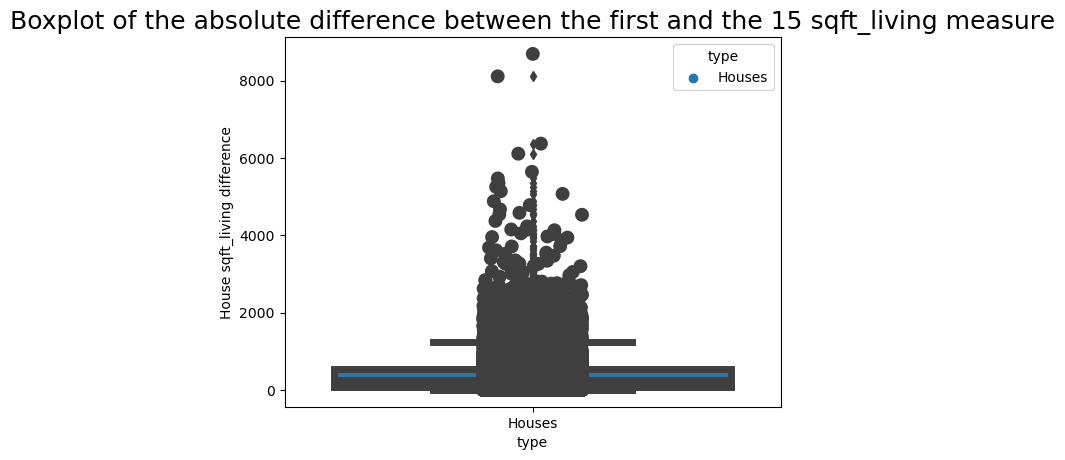

In [46]:
## Checking mean, median and standard deviation of the difference and doing the boxplot
df["first_and_15_sqft_living_dif"] = abs(df['sqft_living'] - df ['sqft_living15'])
print(df[["first_and_15_sqft_living_dif"]].agg(['mean', 'std', 'median']))
chart_df = df
chart_df["type"] = "Houses"
ax = sns.boxplot(x=chart_df["type"], y=chart_df["first_and_15_sqft_living_dif"], linewidth=5)
ax = sns.stripplot(x=chart_df["type"], y=chart_df["first_and_15_sqft_living_dif"], hue = chart_df["type"],linewidth=5)
plt.title("Boxplot of the absolute difference between the first and the 15 sqft_living measure", loc="center", fontsize=18)
plt.ylabel("House sqft_living difference")

plt.show()

In [47]:
## Counting the outliars
outliers_count = df[['first_and_15_sqft_living_dif']].apply(count_outliers)
print("Outliers: {}".format(outliers_count.values[0]))

Outliers: 1134


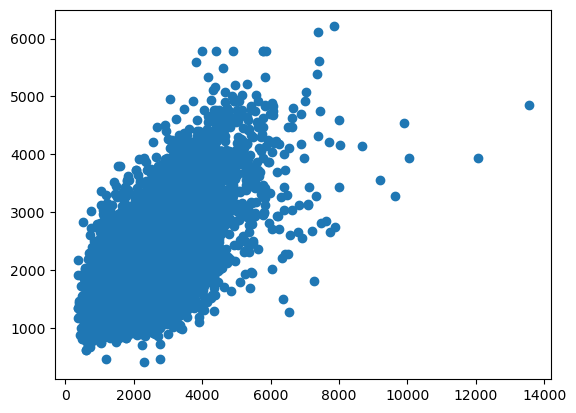

In [48]:
## Maybe sqft_living and sqft_living15 vary linearly?

def column_scatter(data, x, y):
    
    X = df[[x]].values
    y = df[y].values
    
    plt.scatter(X, y)
    plt.show()

column_scatter(df, "sqft_living", "sqft_living15") # No it does not

/home/dionizio/anaconda3/envs/house-sales/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


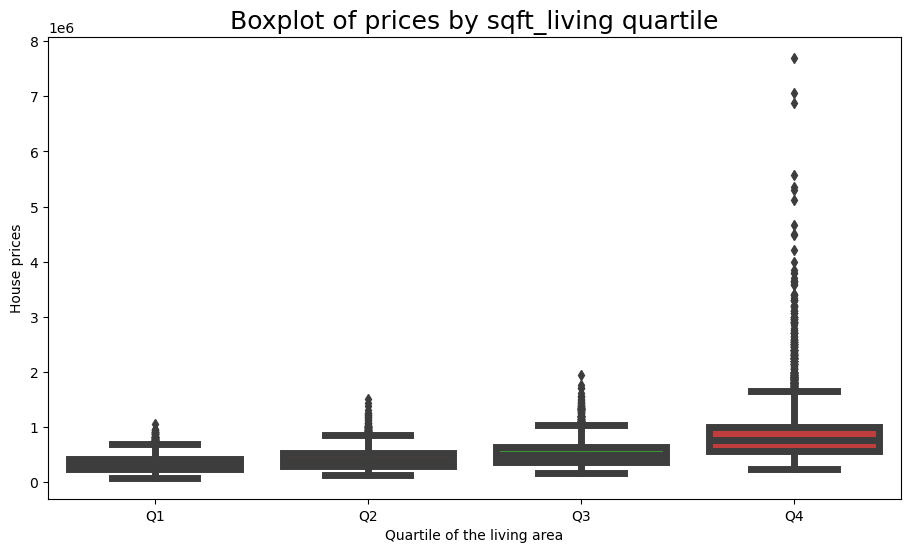

In [49]:
## Grouping sqft_living per quartile and checking how the price vary

df['sqft_quartile'] = pd.qcut(df['sqft_living'], q=[0, 0.25, 0.5, 0.75, 1], 
                              labels=['Q1', 'Q2', 'Q3', 'Q4'])

plt.figure(figsize =(11, 6))
ax = sns.boxplot( x = "sqft_quartile", y ="price",data = df, linewidth=5)
plt.title("Boxplot of prices by sqft_living quartile", loc="center", fontsize=18)
plt.xlabel("Quartile of the living area")
plt.ylabel("House prices")

plt.show() #The chart confirms that prices vary with the living area

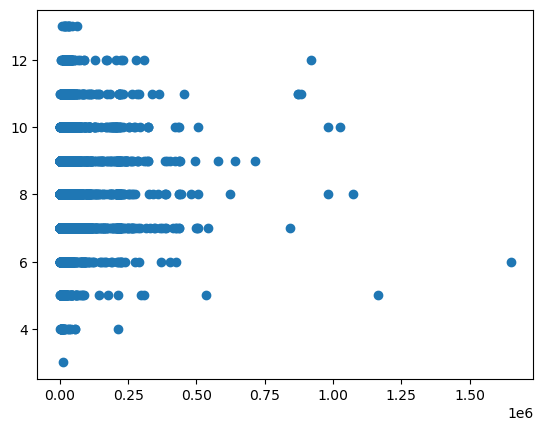

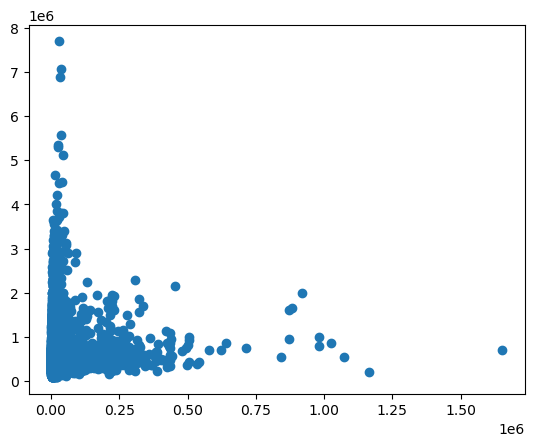

Bigger measures: 8593
Smaller measures: 8534


In [50]:
## The same questions could be asked for sqft_lot and sqft_lot15, thought it seems less important
## since the direct correlation between sqft_lot and price is low

## Checking sqft_lot, in relation to grade
column_scatter(df, "sqft_lot", "grade")

## Checking sqft_lot, in relation to price
column_scatter(df, "sqft_lot", "price")

## When its different, checking if sqft_lot is bigger or smaller than sqft_lot15
bigger = df[(df['sqft_lot'] > df['sqft_lot15'])].shape[0]
smaller = df[(df['sqft_lot'] < df['sqft_lot15'])].shape[0]
print("Bigger measures: {}".format(bigger))
print("Smaller measures: {}".format(smaller))

In [51]:
## Checking mean, median and standard deviation for both sqft_lot and sqft_lot15

single_st(df, "sqft_lot")
single_st(df, "sqft_lot15")

            sqft_lot
mean    15106.843070
std     41430.041768
median   7617.500000
          sqft_lot15
mean    12766.736923
std     27309.454207
median   7620.000000


        first_and_15_sqft_lot_dif
mean                  4697.944959
std                  28630.221377
median                 519.000000


/home/dionizio/anaconda3/envs/house-sales/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dionizio/anaconda3/envs/house-sales/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


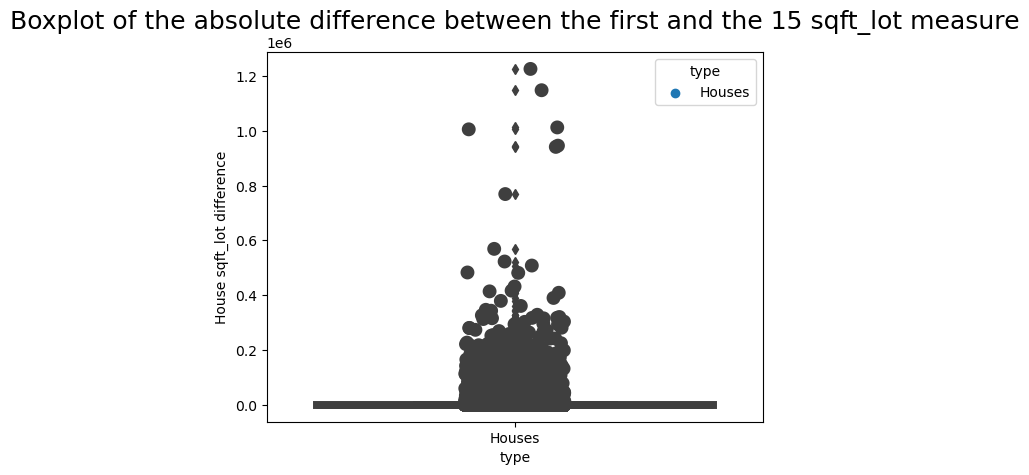

In [52]:
## Checking mean, median and standard deviation of the difference and doing the boxplot
df["first_and_15_sqft_lot_dif"] = abs(df['sqft_lot'] - df ['sqft_lot15'])
print(df[["first_and_15_sqft_lot_dif"]].agg(['mean', 'std', 'median']))
chart_df = df
chart_df["type"] = "Houses"
ax = sns.boxplot(x=chart_df["type"], y=chart_df["first_and_15_sqft_lot_dif"], linewidth=5)
ax = sns.stripplot(x=chart_df["type"], y=chart_df["first_and_15_sqft_lot_dif"], hue = chart_df["type"],linewidth=5)
plt.title("Boxplot of the absolute difference between the first and the 15 sqft_lot measure", loc="center", fontsize=18)
plt.ylabel("House sqft_lot difference")

plt.show() #The chart show a lot of outliars

In [53]:
## Counting outliars of sqft_lot
outliers_count = df[['first_and_15_sqft_lot_dif']].apply(count_outliers)
print("Outliers: {}".format(outliers_count.values[0]))

Outliers: 2460


In [54]:
## Counting outliars of sqft_lot
outliers_count = df[['sqft_lot']].apply(count_outliers)
print("Outliers: {}".format(outliers_count.values[0]))

Outliers: 2420


In [55]:
## Counting outliars of sqft_lot15
outliers_count = df[['sqft_lot15']].apply(count_outliers)
print("Outliers: {}".format(outliers_count.values[0]))

Outliers: 2189


In [56]:
## Looking the log space of the sqft variables over price
def log_plot(df, column):
    plt.scatter(df[column].values, df["price"].values)
    plt.xscale('log')
    plt.xlabel(column + " (Log Scale)")
    plt.title("Log scale of {} X Price".format(column))
    plt.ylabel('Price')
    plt.show()

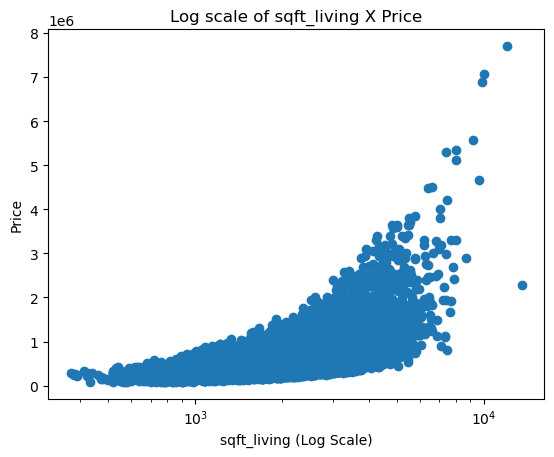

In [57]:
log_plot(df, "sqft_living")

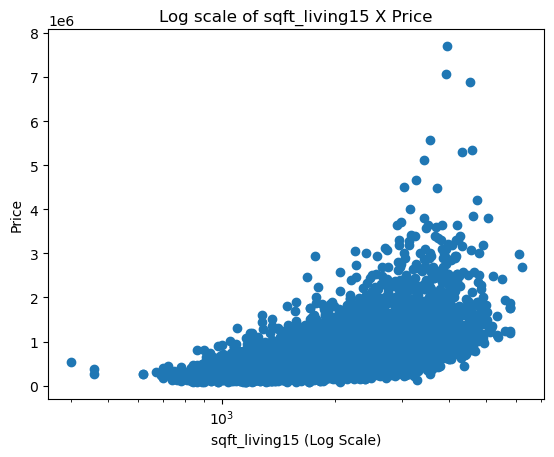

In [58]:
log_plot(df, "sqft_living15")

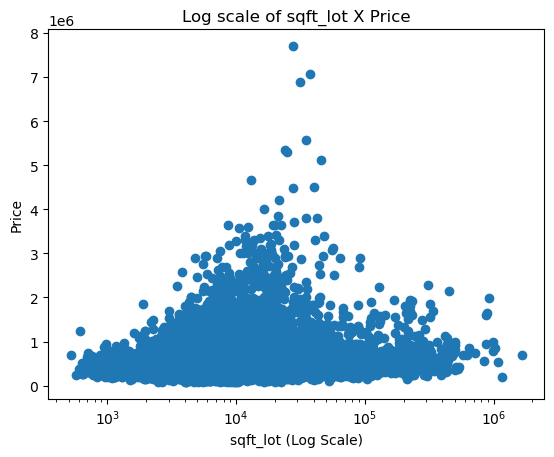

In [59]:
log_plot(df, "sqft_lot")

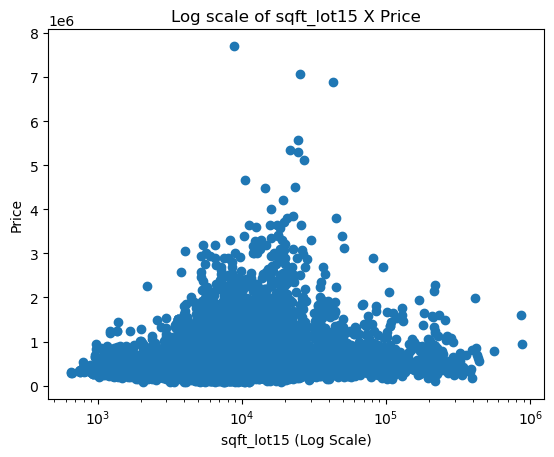

In [60]:
log_plot(df, "sqft_lot15")

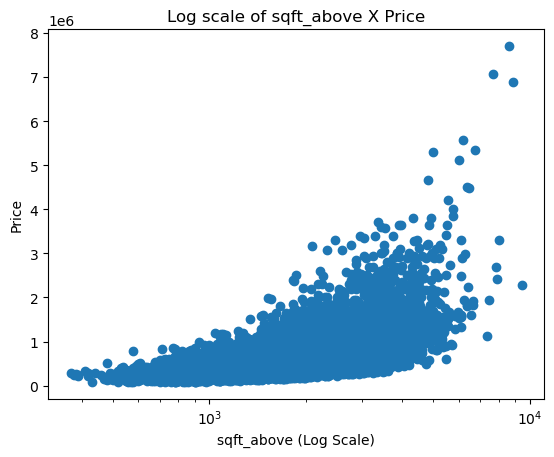

In [61]:
log_plot(df, "sqft_above")

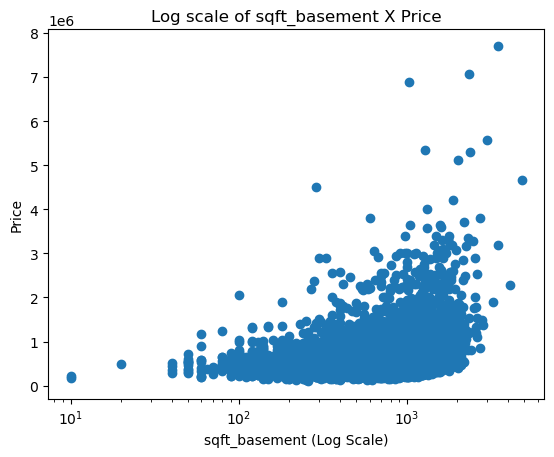

In [62]:
log_plot(df, "sqft_basement")

In [63]:
## Date insights
from datetime import datetime

date_format = "%Y%m%dT%H%M%S"

df["converted_dates"] = df["date"].apply(lambda x: datetime.strptime(x, date_format))
df['day_of_sale'] = df["converted_dates"].dt.day
df['month_of_sale'] = df["converted_dates"].dt.month
df['year_of_sale'] = df["converted_dates"].dt.year

In [64]:
df[["price", "converted_dates", "day_of_sale", "month_of_sale", "year_of_sale"]]

,price,converted_dates,day_of_sale,month_of_sale,year_of_sale
0,221900.0,2014-10-13,13,10,2014
1,538000.0,2014-12-09,9,12,2014
2,180000.0,2015-02-25,25,2,2015
3,604000.0,2014-12-09,9,12,2014
4,510000.0,2015-02-18,18,2,2015
...,...,...,...,...,...
21608,360000.0,2014-05-21,21,5,2014
21609,400000.0,2015-02-23,23,2,2015
21610,402101.0,2014-06-23,23,6,2014
21611,400000.0,2015-01-16,16,1,2015


In [65]:
## Seing the sales by year
df[["year_of_sale"]].value_counts()

year_of_sale
2014            14626
2015             6976
Name: count, dtype: int64

In [66]:
def single_barplot(data, column):
    
    column_series = data[[column]].value_counts().sort_index()
    index_values = [index_value[0] for index_value in column_series.index]
    index_values = np.array(index_values).astype(str)
    data_values = column_series.values


    plt.figure(figsize =(11, 6))
    custom_palette = sns.color_palette("husl", index_values.shape[0])
    sns.barplot(x=index_values, y=data_values, palette=custom_palette)
    for i, value in enumerate(data_values):
        plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title("Bar Plot of the frequency of " + column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

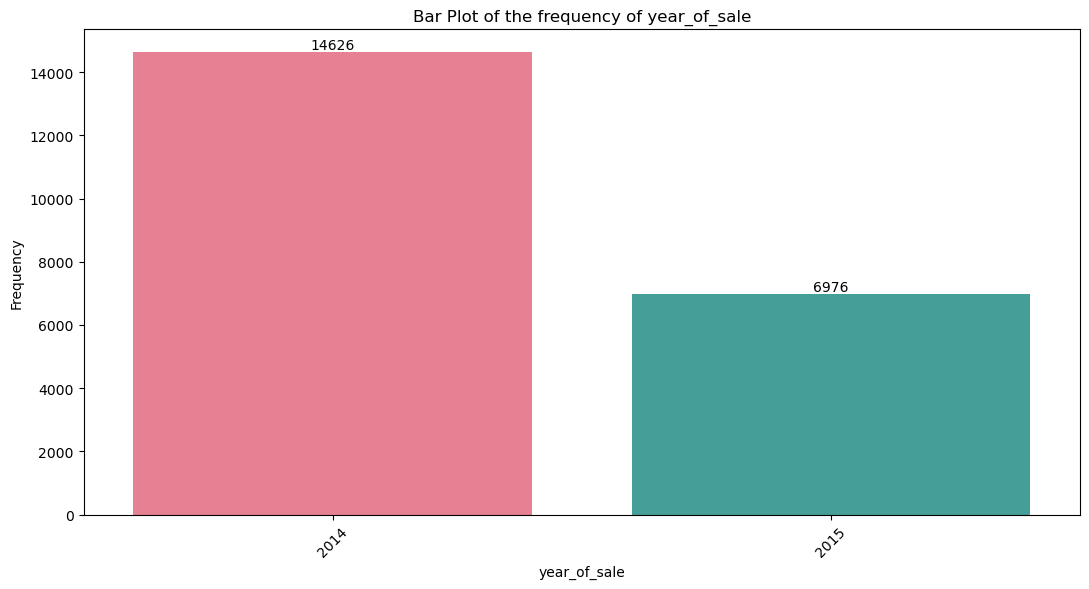

In [67]:
single_barplot(df, "year_of_sale")

In [68]:
##Sales by month of the year
df[["month_of_sale"]].value_counts().sort_index() ##Seems to be less sales when the year is starting or ending

month_of_sale
1                 978
2                1248
3                1875
4                2229
5                2414
6                2177
7                2211
8                1940
9                1772
10               1878
11               1410
12               1470
Name: count, dtype: int64

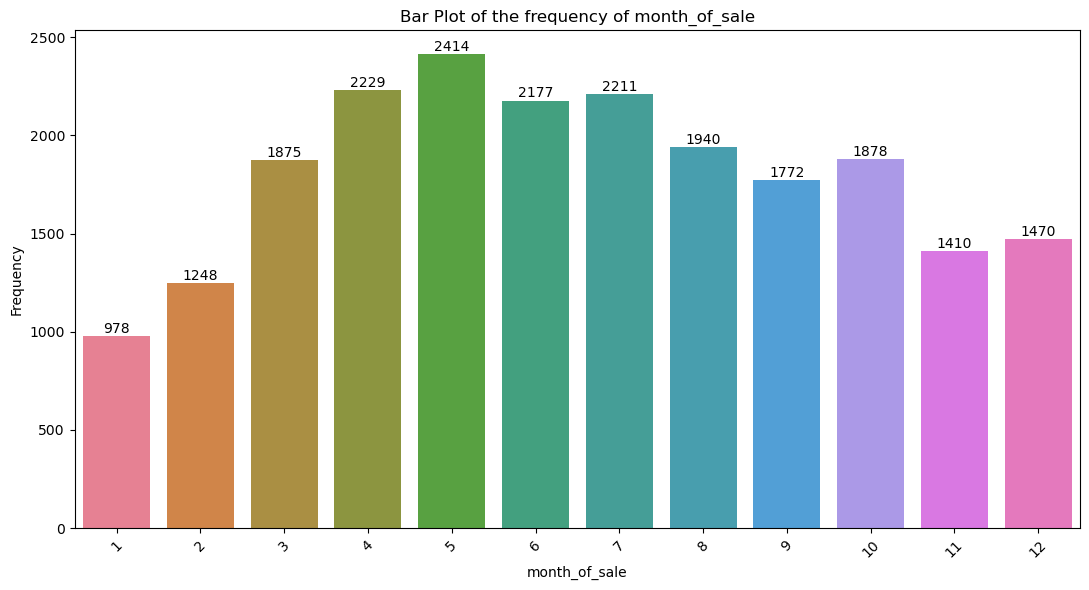

In [69]:
single_barplot(df, "month_of_sale")

In [70]:
## Gonna check when the first and the last sale happened
df["converted_dates"].agg(["min","max"]) 

## The Dataset has sales between May, 02 of 2014 and May, 27 of 2015, being May the only month that appears twice in the dataset. 

min   2014-05-02
max   2015-05-27
Name: converted_dates, dtype: datetime64[ns]

In [71]:
## Checking sales of May for each year
df[(df["month_of_sale"] == 5)]["year_of_sale"].value_counts()

year_of_sale
2014    1768
2015     646
Name: count, dtype: int64

In [72]:
## Does most of the sales occurs in the first or second half of the month?

df["half_of_the_month"] = df["day_of_sale"] <= 15
df["half_of_the_month"] = df["half_of_the_month"].apply(lambda x: "1st Half" if x else "2nd Half")

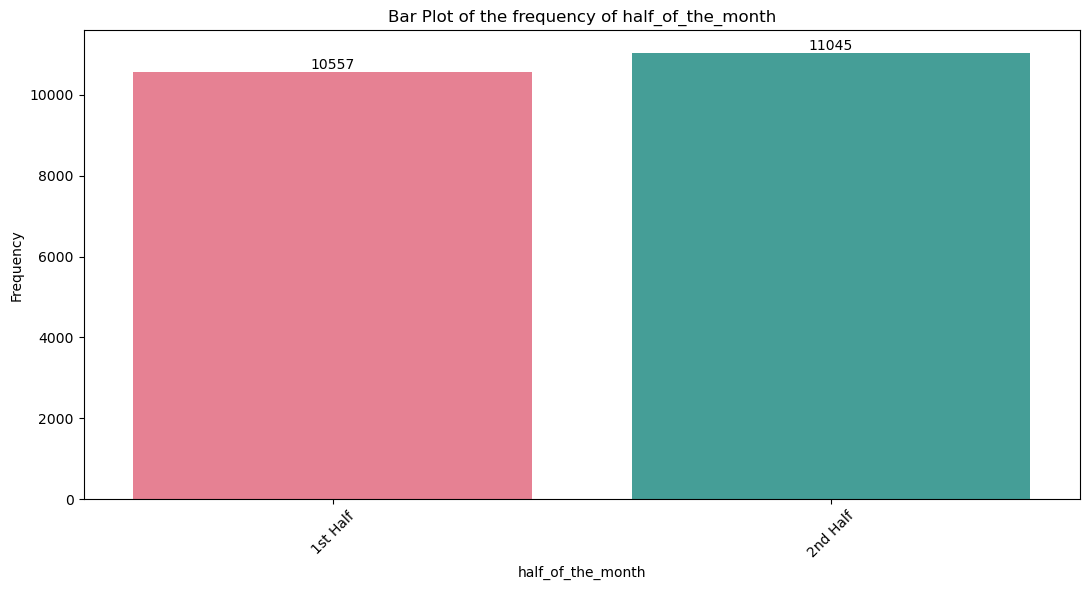

In [73]:
single_barplot(df, "half_of_the_month")

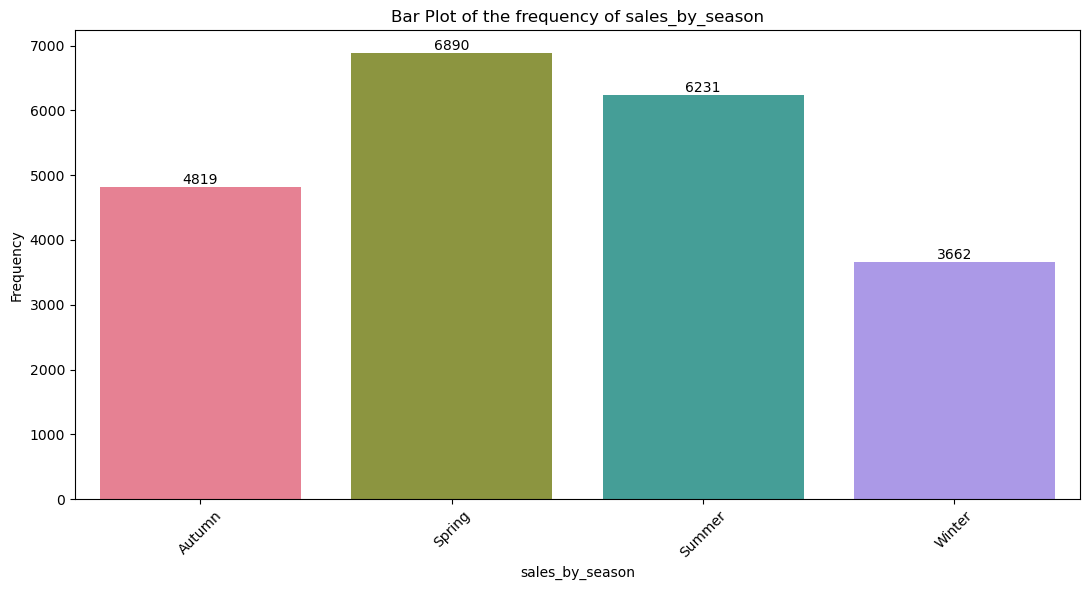

In [74]:
## Sales by season
def get_season(date):
    """Returns the season of the year for a given date."""
    month = date.month
    day = date.day
    if (month < 3) or (month == 3 and day <= 19) or (month == 12 and day >= 21):
        return "Winter"
    elif (month < 6) or (month == 6 and day <= 21):
        return "Spring"
    elif (month < 9) or (month == 9 and day <= 23):
        return "Summer"
    else:
        return "Autumn"

df["sales_by_season"] = df["converted_dates"].apply(get_season)
single_barplot(df, "sales_by_season") ## Seems that more sales occurs in Spring and Summer

In [75]:
## Now, are any of these features related to the price of a sale?

season_encoding = {"Winter": 0, "Spring": 1, "Summer": 2, "Autumn": 3}
df["encoding_season"] = df["sales_by_season"].map(season_encoding)
half_encoding = {"1st Half": 0, "2nd Half": 1}
df["half_encoding"] = df["half_of_the_month"].map(half_encoding)

df[["price", "day_of_sale", "month_of_sale", "year_of_sale", "encoding_season", "half_encoding"]].corr() ##Nothing correlated

,price,day_of_sale,month_of_sale,year_of_sale,encoding_season,half_encoding
price,1.000000,-0.014699,-0.010072,0.003833,-0.005288,-0.025396
day_of_sale,-0.014699,1.000000,-0.060740,-0.006034,-0.008028,0.868173
month_of_sale,-0.010072,-0.060740,1.000000,-0.782378,0.865816,-0.048938
year_of_sale,0.003833,-0.006034,-0.782378,1.000000,-0.706890,-0.008080
encoding_season,-0.005288,-0.008028,0.865816,-0.706890,1.000000,-0.013077
half_encoding,-0.025396,0.868173,-0.048938,-0.008080,-0.013077,1.000000


In [76]:
## Now, are any of these features related to the price of a sale?
def mean_sale_barplot(data, column, statistic = "mean"):
    
    column_series = data[[column]].value_counts().sort_index()
    index_values = [index_value[0] for index_value in column_series.index]
    index_values = np.array(index_values)
    ##Extracting the Mean
    data_values = []
    for i in index_values:
        data_index = data[data[column] == i]
        data_values.append(data_index["price"].agg([statistic]).values[0])
    data_values = np.array(data_values)

    index_values = index_values.astype(str)

    plt.figure(figsize =(11, 6))
    custom_palette = sns.color_palette("husl", index_values.shape[0])
    sns.barplot(x=index_values, y=data_values, palette=custom_palette)
    for i, value in enumerate(data_values):
        plt.text(i, value + 0.5, str(round(value, 2)), ha='center', va='bottom')

    plt.xlabel(column)
    plt.ylabel("Mean")
    plt.title("Mean sales by " + column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

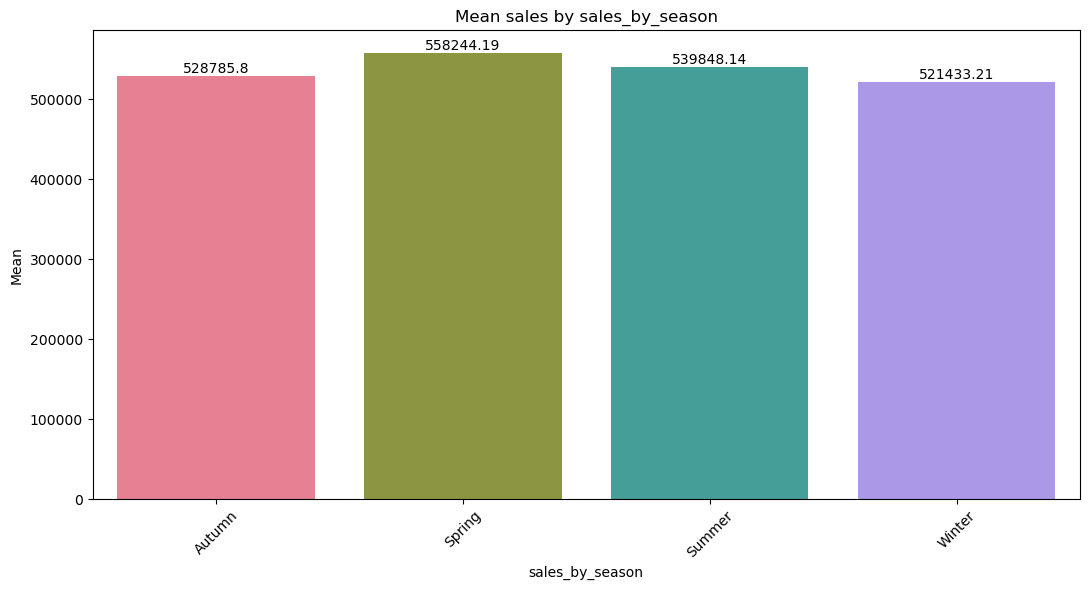

In [77]:
mean_sale_barplot(df, "sales_by_season")

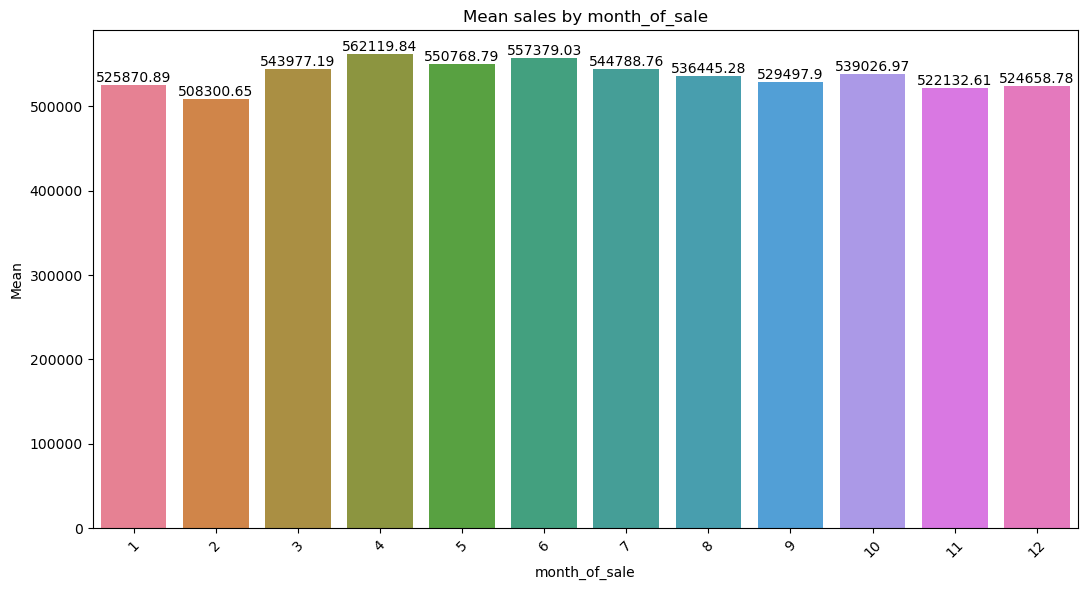

In [78]:
mean_sale_barplot(df, "month_of_sale")

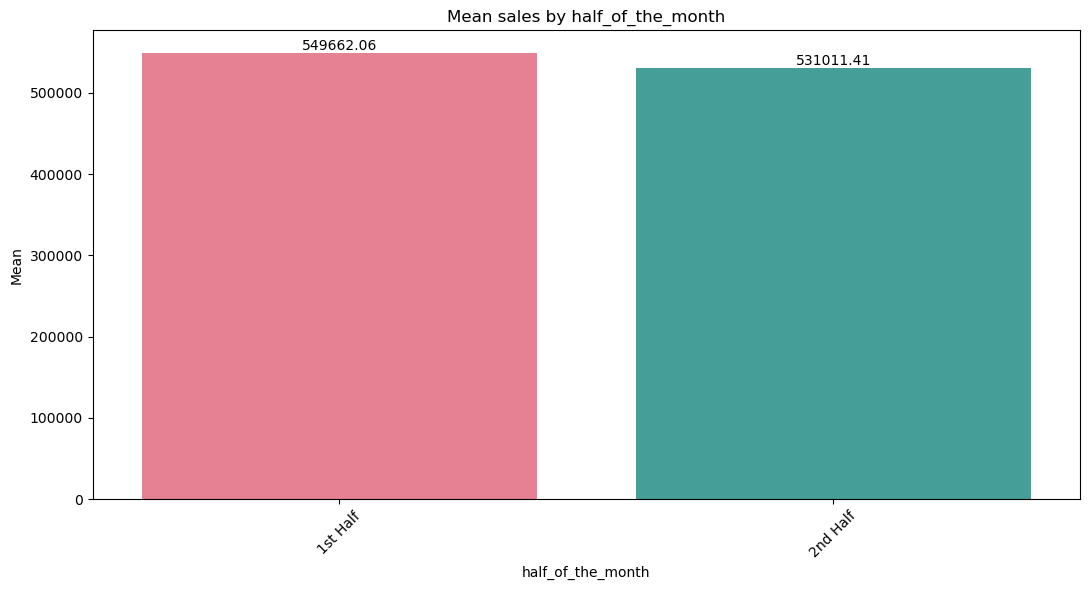

In [79]:
mean_sale_barplot(df, "half_of_the_month")

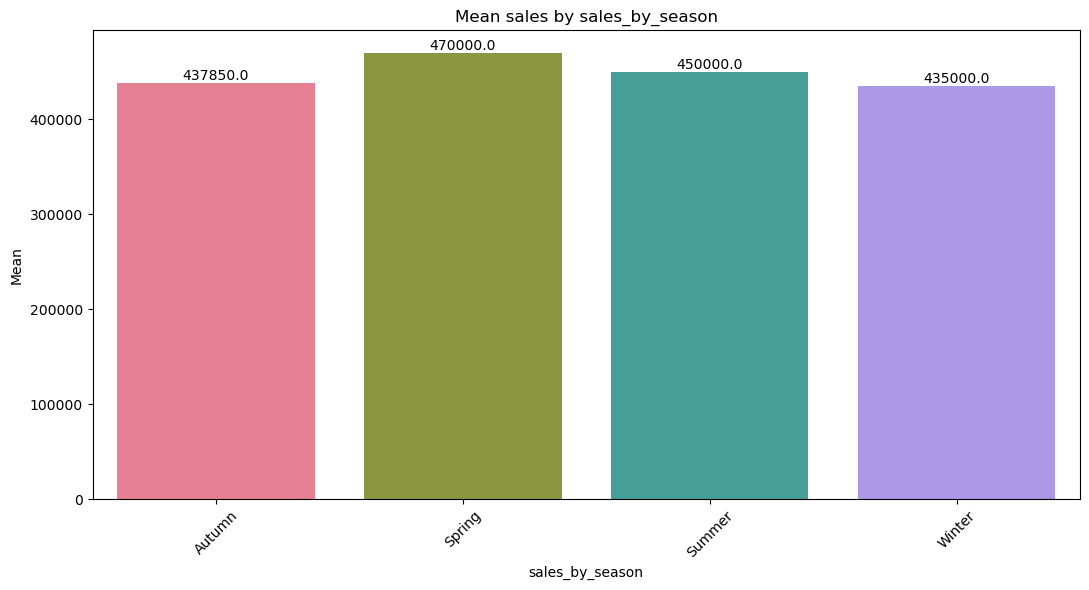

In [80]:
## Medians

mean_sale_barplot(df, "sales_by_season", "median")

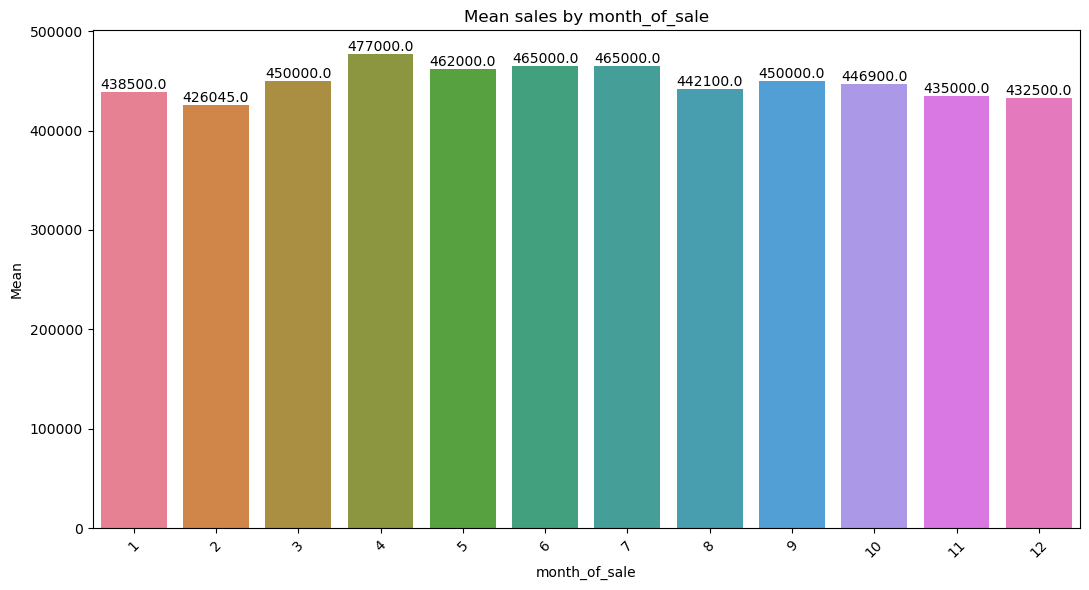

In [81]:
## Medians

mean_sale_barplot(df, "month_of_sale", "median")